In [1]:
import numpy as np
from scipy.stats import bernoulli,binom_test,binom,norm,probplot,t,chi2,f,ttest_ind,ttest_1samp,wilcoxon  
import matplotlib.pyplot as plt
import seaborn as sns

참고문헌 

* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3096219/
* http://www.biostathandbook.com/kruskalwallis.html

** 전통통계는 어떤 시스템을 정의하는 방법이다 ** 

시스템 : 주사위, 온실, 세포, 경상남도, 진주시, 가좌동, 경상대학교, 생명과학부 

# 이항분포 (Binomial distribution)

* 시행의 결과가 2개; 성공/실패 
* 시행수가 고정
* 시행의 결과(성공) 확률이 주어짐 

![](./img/binom2.jpg)

* 이런 그림을 그려주는 공식을 구하게 되었다. 


![이항분포 공식](https://wikimedia.org/api/rest_v1/media/math/render/svg/38d86cba65d40f015a2b807d2b736250805abe45)

공식설명 : n번의 시행 중 성공할 확률이 p라고 할때 k번 성공할 확률

![](https://ppss.kr/wp-content/uploads/2013/06/image21.jpg)

공식이란건 결국

![](./img/function.jpg)

In [2]:
N     = 50   # 고정된 시행수 -> mass function 
theta = 0.5  # 확률 (성공,양성,etc..)
rv    = binom(N, theta)

**위와 같은 방식으로 이미 정의된 공식을 불러올 수 있다.**

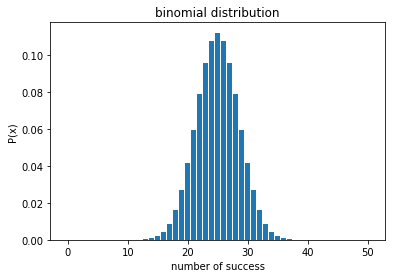

In [3]:
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center") # 공식을 통한 확률 계산.
plt.ylabel("P(x)")
plt.xlabel("number of success")
plt.title("binomial distribution")
plt.show()

**정의된 함수가 있다면 그래프를 통해 성공확률을 눈으로 확인가능**

* pmf : probability mass function - 막대그래프 (비연속)
* pdf : probability density function - 선그래프 (연속)

---

## 공식은 믿지 않는다 실험을 하게 해달라! 

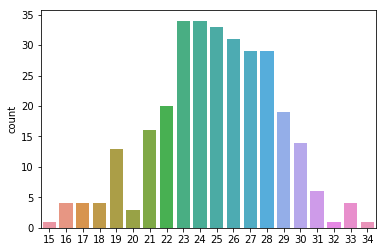

In [4]:
x = rv.rvs(300)
sns.countplot(x)
plt.show()

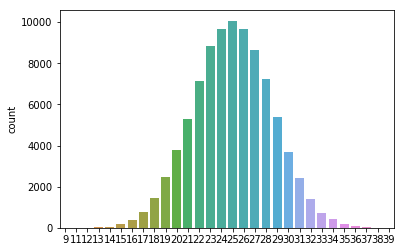

In [5]:
#시뮬레이션 
#np.random.seed(1)
results = []
for i in range(300):
    x = rv.rvs(300) # rvs : random variate 생성 (https://en.wikipedia.org/wiki/Random_variate)
    results += list(x)
sns.countplot(results)
plt.show()

![](./img/5GWgW.png)

In [6]:
# 모집단 정보 
N = 6  # 총 6번의 시행중 
p = 0.3 # 알려진 성공확률이 0.3일때 
# 관찰
x = 1  # 1번 성공할 확률 
binom.pmf(x,N,p)

0.30252600000000013

**총 몇번의 시행중 몇번을 성공하였는지를 기록하면 가설(알려진 성공확률)과 검증가능**


---

## 주목할점

- 전통 통계는 몇가지 값을 기반으로 함수를 만들어 시스템을 정의하는 방법임
- 이항분포의 경우에는 N (시행수),p (성공확률) 였다.

---

# 가우시안 분포

* 정규분포
* 평균과 분산으로만 정의 가능

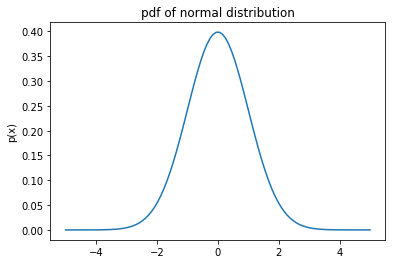

In [7]:
mu  = 0 # 평균
std = 1 # 분산 
rv  = norm(mu, std)
xx  = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx))
plt.ylabel("p(x)")
plt.title("pdf of normal distribution")
plt.show()

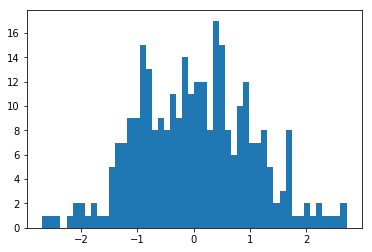

In [11]:
# 여기서도 시뮬레이션가능 
x = rv.rvs(300)
plt.hist(x,bins=50)
plt.show()

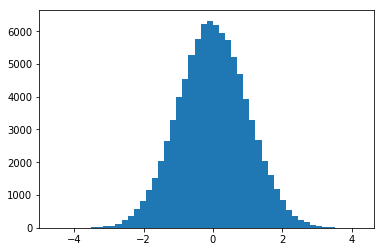

In [10]:
results = []
for i in range(300):
    x = rv.rvs(300) # rvs : random variate 생성 (https://en.wikipedia.org/wiki/Random_variate)
    results += list(x)
plt.hist(results,bins=50)
plt.show()

**정규분포검정** : Q-Q plot

* 동일 분위수에 해당하는 정상 분포의 값과 주어진 분포의 값을 한 쌍으로 만들어 스캐터 플롯(scatter plot)
* sample array 를 sort하고 분위별로 theoretical value를 가져옴. 

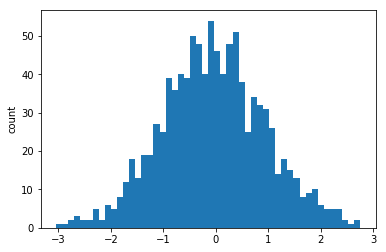

In [12]:
np.random.seed(0)
x = np.random.randn(1000) # 렌덤 넘버 생성, 정규분포를 따르도록 렌덤넘버 생성 https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html
plt.hist(x,bins=50)
plt.ylabel('count')
plt.show()

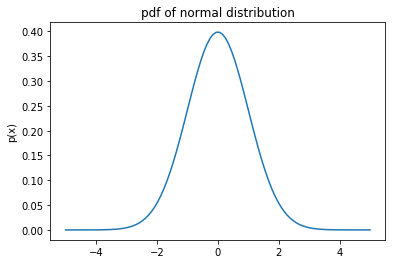

In [13]:
mu  = 0 # 평균
std = 1 # 분산 
rv  = norm(mu, std)
xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx))
plt.ylabel("p(x)")
plt.title("pdf of normal distribution")
plt.show()

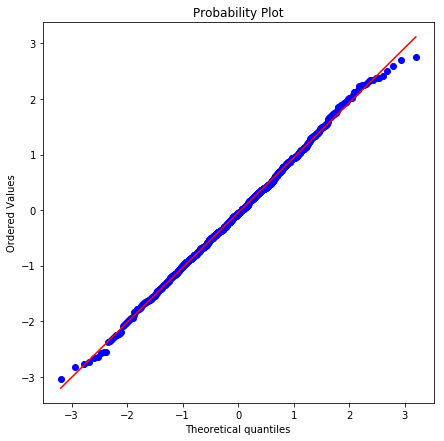

In [14]:
plt.figure(figsize=(7,7))
probplot(x, plot=plt) # Q-Q plot 
plt.axis("equal")
plt.show()

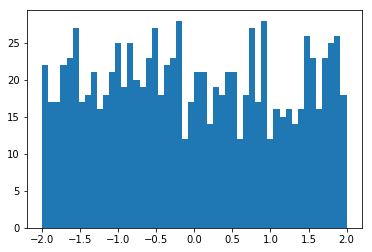

In [21]:
np.random.seed(0)
x = np.random.uniform(-2, 2, 1000) # random samples from uniform distribution, https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html
plt.hist(x,bins=50)
plt.show()

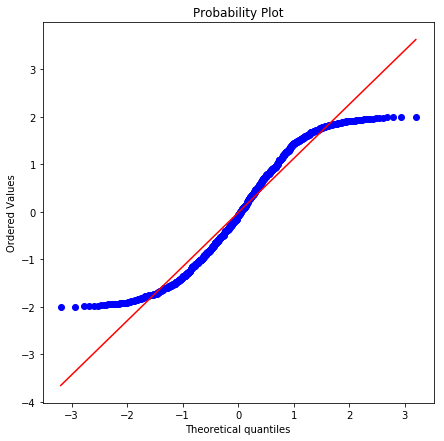

In [22]:
plt.figure(figsize=(7,7))
probplot(x, plot=plt)
#plt.ylim(-0.5, 1.5)
plt.show()

# 스튜던트 t분포 

* 실제로는 정규분포보다 양 끝단의 비중이 더 큼, 샘플사이즈에 따라 달라짐
* 이런 데이터에 적합한 모델을 만들기 위해 자유도를 줌 
* **정규분포를 따르는 모집단** 에서 **크기가 n인 표본**을 무작위로 반복하여 추출하였을 때, 각 표본에 대해 구한 평균,모집단의 평균을 샘플사이즈와 분산을 고려하여 t-value 분포를 계산. 
* 샘플사이즈가 커질 수록 정규분포에 가까워진다. 
* df에 따라 다른 분포! 

In [3]:
# pip install pandas_datareader

import pandas_datareader.data as web
import pandas as pd 
symbols = ['^GDAXI', '^GSPC', 'MSFT']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='yahoo', start='1/1/2006', end='12/31/2015')['Adj Close']
data = data.dropna()
(data / data.ix[0] * 100).plot()
plt.show()

ImmediateDeprecationError: 
Yahoo Daily has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues


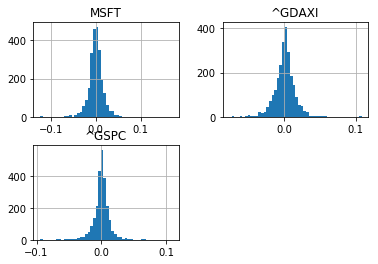

In [16]:
log_returns = np.log(data / data.shift(1)) # 증감비율을 log를 취함. 
log_returns.hist(bins=50)
plt.show()

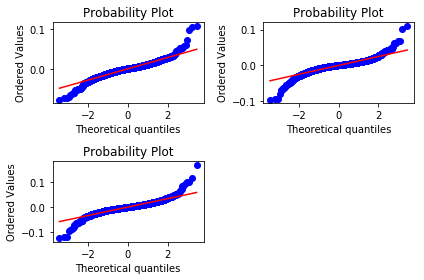

In [17]:
# 정규분포를 따르지 않고 fat tail현상을 보인다. 
for i, sym in enumerate(symbols):
    ax = plt.subplot(2,2,i+1)
    probplot(log_returns[sym].dropna(), plot=ax)
plt.tight_layout()
plt.show()

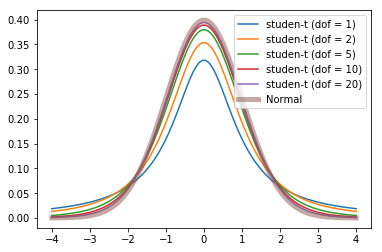

In [18]:
# studen-t 분포는 일반 정규분포보다 자유도에따라서 양끝단을 뚱뚱하게 해준다. 
xx = np.linspace(-4, 4, 100)
for df in [1, 2, 5, 10, 20]:
    rv = t(df=df)
    plt.plot(xx, rv.pdf(xx), label=("studen-t (dof = %d)" % df))
plt.plot(xx, norm().pdf(xx), label="Normal", lw=5, alpha=0.5)
plt.legend()
plt.show()

**t test one sample**

* 주어진 관찰값의 평균을 모집단의 평균과 비교해서 모집단에서 비롯된 데이터가 맞다 틀리다를 판단 

In [44]:
rvs = norm.rvs(loc=5, scale=10, size=(50))

In [45]:
np.mean(rvs)

5.9835940812515513

In [48]:
ttest_1samp(rvs,5.0)

Ttest_1sampResult(statistic=0.72691058633782524, pvalue=0.47073942912686129)

**t test two sample **
* 두 집단이 평균이 유의하게 다른지를 비교한다. 
* 분산은 두 집단이 같은것으로 가정한다
* 귀무가설: 비교하는 두 평균이 하나의 모집단에서 비롯되었다
* 두 그룹의 샘플이 하나의 모집단에서 왔을 가능성은? 
* a, b 관찰값들이 하나의 T value로 나타나고 T value 가 T 분포에서 어느 위치인지 확인한다 

In [19]:
a = [30.02,29.99,30.11,29.97,30.01,29.99]
b = [29.89,29.93,29.72,29.98,30.02,29.98]
ttest_ind(a, b, equal_var=True) # identical variance 

Ttest_indResult(statistic=1.9590058081081436, pvalue=0.078565773857230708)

In [20]:
a = [30.02,29.99,30.11,29.97,30.01,29.99]
b = [29.89,29.93,29.72,29.98,30.02,29.98]
ttest_ind(a, b, equal_var=False) # not identical variance (Welch's ttest)

Ttest_indResult(statistic=1.9590058081081434, pvalue=0.090773324285661136)

*note : 각 집단의 모집단이 결코 정규분포일것 같지 않다면 non-parametric test를 시도 해보자* [link](http://blog.minitab.com/blog/adventures-in-statistics-2/choosing-between-a-nonparametric-test-and-a-parametric-test)

![](./pic_170831/parametricNnonpara.PNG)

---

# 카이제곱분포
* 분산의 제곱 분포
* **정규분포를 따르는 모집단**에서 크기가 **n인 표본**을 무작위로 반복하여 추출하였을 때, 각 표본에 대해 구한 표본분산들은 카이제곱 분포를 따른다. 카이제곱확률변수는 다음과 같이 **자유도 (n-1)**인 카이제곱 분포를 따른다.

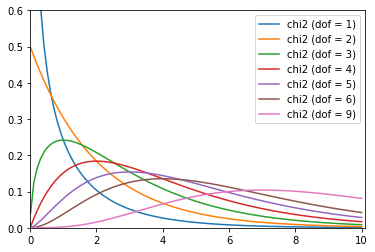

In [21]:
xx = np.linspace(0.01, 10, 100)
for df in [1, 2, 3, 4, 5, 6, 9]:
    rv = chi2(df=df)
    plt.plot(xx, rv.pdf(xx), label=("chi2 (dof = %d)" % df))
plt.xlim(0, 10.1)
plt.ylim(0, 0.6)
plt.legend()
plt.show()

# 카이제곱검정

![](https://i0.wp.com/www.statisticshowto.com/wp-content/uploads/2013/09/chi-square-formula.jpg)

In [22]:
from scipy.stats import chisquare
chisquare([16, 18, 16, 14, 12, 12], f_exp=[16, 16, 16, 16, 16, 8])

Power_divergenceResult(statistic=3.5, pvalue=0.62338762774958223)

**예제** 

분리의 법칙(이론) : 황색 콩과 녹색 콩을 교배한 F2세대의 분리비는 3:1이다.

관찰자가 F2세대의 콩을 8023개를 얻었을 때 그 관찰수

황색 콩 = 6022개

녹색 콩 = 2001개

관찰값은 분리비 모델을 따르는가? 

In [23]:
chisquare([6022,2001], f_exp=[(8023/4)*3,(8023/4)*1]) # 귀무가설이 참 

Power_divergenceResult(statistic=0.016126350789692434, pvalue=0.89894865395758872)

In [24]:
chisquare([2011,6022], f_exp=[(8023/4)*3,(8023/4)*1]) # 귀무가설 거짓 

Power_divergenceResult(statistic=10713.363757273482, pvalue=0.0)

# F 분포
* 카이제곱 분포를 따르는 두개의 집단의 분산을 비교할 때 사용한다. 
* 두 집단의 분산이 같은지, 다른지?
* 두 집단의 자유도를 입력값으로 받는다. 
* 두 집단의 자유도를 기반으로한 F 분포를 통해 두 집단 검정가능 
* F = Var(A집단) / Var(B집단)  *## check : 샘플의 분산이므로 SS/df*
![](./pic_170831/Fdist.PNG)


/home/k821209/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  from ipykernel import kernelapp as app
/home/k821209/miniconda2/lib/python2.7/site-packages/matplotlib-2.0.2-py2.7-linux-x86_64.egg/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/k821209/miniconda2/lib/python2.7/site-packages/matplotlib-2.0.2-py2.7-linux-x86_64.egg/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


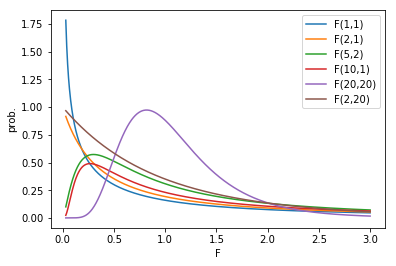

In [2]:
xx = np.linspace(0.03, 3, 1000)
plt.hold(True)
plt.plot(xx, f(1,1).pdf(xx), label="F(1,1)")
plt.plot(xx, f(2,1).pdf(xx), label="F(2,1)")
plt.plot(xx, f(5,2).pdf(xx), label="F(5,2)")
plt.plot(xx, f(10,1).pdf(xx), label="F(10,1)")
plt.plot(xx, f(20,20).pdf(xx), label="F(20,20)")
plt.plot(xx, f(2,20).pdf(xx), label="F(2,20)")
plt.ylabel('prob.')
plt.xlabel('F')
plt.legend()
plt.show()

In [2]:
# 분산이 다른 a집단과 b집단 # 공사중
'''a = [1,2,1,2,1,2,1,2,1,2]
b = [1,3,-1,2,1,5,-1,6,-1,2]
F = np.var(a) / np.var(b)
df1 = len(a) - 1
df2 = len(b) - 1
print 'p value:', f.cdf(F, df1, df2) # p values '''

"a = [1,2,1,2,1,2,1,2,1,2]\nb = [1,3,-1,2,1,5,-1,6,-1,2]\nF = np.var(a) / np.var(b)\ndf1 = len(a) - 1\ndf2 = len(b) - 1\nprint 'p value:', f.cdf(F, df1, df2) # p values "

In [3]:
# 분산이 비슷한 a집단과 b집단 # 공사중 
'''a = [1,2,1,2,1,2,1,2,1,2]
b = [1,2,1,2,2,2,1,2,0,2]
F = np.var(a) / np.var(b)
df1 = len(a) - 1
df2 = len(b) - 1
print 'p value:', f.cdf(F, df1, df2) # p values'''

"a = [1,2,1,2,1,2,1,2,1,2]\nb = [1,2,1,2,2,2,1,2,0,2]\nF = np.var(a) / np.var(b)\ndf1 = len(a) - 1\ndf2 = len(b) - 1\nprint 'p value:', f.cdf(F, df1, df2) # p values"

*note : 각집단이 정규분포를 보이고 있는지 여부에 상당히 민감하다고 함. 실제 수집된 데이터에는 사용하지 않는것이 좋을 수 있다고 한다.*

# **Analysis Of Variance (ANOVA)**

* The dependent variable is normally distributed in each group
* population variances in each group are equal.
* Independence of observations.
![](./file_170904/ANOVA_case.PNG)

F = Var(**Between groups**) / Var(**Within groups**)

Var(**Between groups**) (MS<sub>B</sub>): 각 그룹의 평균을 관찰값으로 보고 총 평균과의 분산 ## *각 분산값을 해당 그룹 관찰수로 곱해줘야함* (보고 잊자)  
Var(**Within groups**)  (MS<sub>W</sub>): 각 그룹의 관찰값을 각 그룹의 평균과의 분산을 조사하고 Sum 

# 사후분석 (Post-hoc test)

Tukey HSD (Honestly significant difference) 

* 정규분포를 보이는 모집단에서 총 n개의 관찰값을 k 개의 group으로 뽑았을때 일어날 수 있는 경우 중에서 
* maximum mean, minimum mean을 계산 (마법과 같은 수학) 
* 이때 n, 과 k, 그리고 유의성 $alpha$ (0.05, 0.01 etc.)를 고려하여 q value를 정의했다. -> Q table
* q value 에는 df(n-k), $alpha$, k가 고려됨.   

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/af500b658e6f25407eead1d5b3967ed9ee16e27c)

* 저 공식 아닌듯. 맞는 공식 찾으면 제보 부탁
* 귀무가설은 총 n개의 관찰값을 지니는 k개의 그룹이 같은 정규분포를 보이는 모집단에서 왔다. 
* 그렇다면 최대 "어느정도"의 평균차이가 난다.(Critical range)
* "어느정도" 는 q table에서 찾을 q value 를 통해 추정가능 
* ANOVA이후 각 그룹간 평균 차이가 Critical range보다 크면, 유의하게 차이가 나는것 (유의수준은 $alpha$) 

![](./pic_170831/HSD.PNG)

## two-way ANOVA
* 하나의 측정도구 
* 두개의 분류기준 
* 귀무가설 :각각의 분류기준에 따른 측정치는 차이가 없다., 각각의 분류기준은 상호작용이 없다. 
![](./pic_170831/twowayanova_scheme.jpg)
![](./pic_170831/twowayanova_table.jpg)
![](./pic_170831/twowayanova_table1.jpg)
![](./pic_170831/twowayanova_table2.jpg)

In [1]:
## two way anova 예제 측정치는 효소활성 하나, 분류기준은 성별, genotype으로 두개 이상이다. 
import pandas as pd 
pd.read_excel('./file_170904/twowayanova.xlsx')

,Genotype,Female,Male
0,FF,2.838,1.884
1,FF,4.216,2.283
2,FF,2.889,4.939
3,FF,4.198,3.486
4,FS,3.550,2.396
5,FS,4.556,2.956
6,FS,3.087,3.105
7,FS,1.943,2.649
8,SS,3.620,2.801
9,SS,3.079,3.421


---


[(참고링크 1)](http://blog.minitab.com/blog/adventures-in-statistics-2/choosing-between-a-nonparametric-test-and-a-parametric-test) Parametric test는 최소 다음과 같은 조건을 만족한다면 관찰값이 보기에 정규분포를 보이지 않더라도 대부분의 경우 잘 워킹한다. 
![](./pic_170831/numbers_for_parametric.PNG)

# **Non-parametric tests (Distribution free test) **

* 이 테스트 들은 어떤 분포를 가정하지 않는다.
* 관찰값 중 무시할 수 없는 극단값이 존재할 경우; ex> 한국인 연봉 분포
* 관찰값의 수가 적을 때

![](./pic_170831/parametricNnonpara.PNG)


## **1-sample Sign** 

 * 두 관찰값 list
 * 두 관찰값 갯수는 같아야함. 
 * 두 관찰값을 정렬하고 서로 뺀다. 
 * 값이 같을 경우 무시
 
![](./pic_170831/sign_test.PNG)

* 귀무가설 : 두 데이터의 median 차이는 없다. 
* 그렇다면 두 관찰값 set의 차이 (sign; +,-) 발생의 확률은 binomial distribution (n= number of sign, p=0.5) 를 따를 것이다. 

## **1-sample Wilcoxon rank sum test**

* 두 관찰값 갯수가 같다. 
* 귀무가설 : difference between the pairs follows a symmetric distribution around zero, 두 쌍의 차이는 표준정규분포를 보인다. 
* 두 관찰값 A, B를 섞고 순위를 매긴다. 
* A관찰값세트의 순위합을 R<sub>A</sub> 
* B관찰값세트의 순위합을 R<sub>B</sub>
* 두 관찰값 세트가 비슷하면 순위합도 비슷하겠지 : 관측값들이 고르게 섞인다. 
* 총 관찰값 세트의 가능한 순위조합을 모두 구한다. N<sub>A</sub>+N<sub>B</sub>
* 이들의 순위합 분포를 구한다 -> 정규분포
* 관찰값 순위합은 분포의 어디에 해당하는가? p-value






In [1]:
import numpy as np
obs_a = np.array([18.3,13.3,16.5,12.6,9.5,13.6,8.1,8.9,10.0,8.3,7.9,8.1,13.4])
obs_b = np.array([12.7,11.1,15.3,12.7,10.5,15.6,11.2,14.2,16.2,15.5,19.9,20.4,36.8])

In [2]:
len(obs_a) == len(obs_b)

True

In [3]:
obs_s = obs_a - obs_b 
obs_sign = obs_s / np.abs(obs_s)
print list(obs_sign).count(1)
print list(obs_sign).count(-1)

3
10


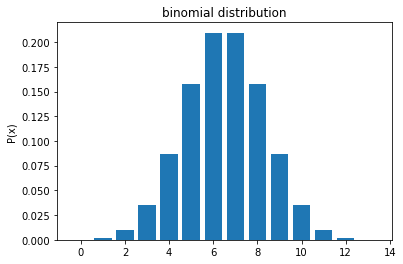

In [6]:
N     = 13  # 고정된 시행수 -> mass function 
theta = 0.5  # 확률 (성공,양성,etc..)
rv = binom(N, theta)
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center") # 공식을 통한 확률 계산.
plt.ylabel("P(x)")
plt.title("binomial distribution")
plt.show()

In [7]:
binom_test(3,13,0.5)

0.092285156250000028

In [8]:
wilcoxon(obs_a,obs_b)

WilcoxonResult(statistic=16.0, pvalue=0.039243276150326668)

In [9]:
X = np.array([117.1, 121.3, 127.8, 121.9, 117.4, 124.5, 119.5, 115.1])
Y = np.array([123.5, 125.3, 126.5, 127.9, 122.1, 125.6, 129.8, 117.2])

In [10]:
wilcoxon(X,Y)

/home/k821209/miniconda2/lib/python2.7/site-packages/scipy-0.19.1-py2.7-linux-x86_64.egg/scipy/stats/morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


WilcoxonResult(statistic=2.0, pvalue=0.025061844343883619)

## Fisher's exact test (http://dermabae.tistory.com/175)

![](./pic_170831/contingency_table.PNG)
* 두 기준 간의 상관관계가 있는가? 
* 비만여부, 당뇨여부
* 가볍게 생각하면 당뇨여부에 상관없이 비만인 사람 비율이 같으면 두 기준간에는 아무런 상관이 없다고 말 할 수 있다. 
* 이걸 통계하려면? 
![](./pic_170831/contingency_table_calc.PNG)

In [25]:
from scipy.stats import fisher_exact 

In [26]:
fisher_exact([[2,2],[3,13]])

(4.333333333333333, 0.2487100103199176)

In [29]:
# 관찰값들을 그대로 10배 해주면 ? 
fisher_exact([[20,20],[30,130]]) # N수의 효과 

(4.333333333333333, 0.00014670104798350237)

# Median test (non-parametric ANOVA)

* H0 : 관찰값 세트들의 중간값은 같다. 

* 기준1 : 관찰값 세트들 
* 기준2 : 관찰값이 중간보다 큰가 작은가 
* contingency table 
* fisher's exact or chi square test 



In [30]:
import numpy as np

In [33]:
globalM = np.median(list(X)+list(Y))
print globalM 

122.8


In [36]:
(X > globalM)

array([False, False,  True, False, False,  True, False, False], dtype=bool)

In [35]:
(X > globalM).nonzero()[0] 

array([2, 5])

In [43]:
Xa = len((X > globalM).nonzero()[0]) # X above global median 
Xb = len((X < globalM).nonzero()[0]) # X below global median 
Ya = len((Y > globalM).nonzero()[0]) # Y above global median 
Yb = len((Y < globalM).nonzero()[0]) # Y above global median 

In [44]:
fisher_exact([[Xa,Xb],[Ya,Yb]])

(0.1111111111111111, 0.13193473193473185)

In [45]:
from scipy.stats import median_test

In [46]:
median_test(X,Y)

(2.25, 0.13361440253771584, 122.8, array([[2, 6],
        [6, 2]]))

# Kruskal-Wallis H-test

* H0 :  the population median of all of the groups are equal.
* non-parametric version of ANOVA. 
* 세트당 최소 5개의 관찰값이 있어야함 
* wilconxon rank sum test랑 비슷함. 이번엔 순위합이 아니라 
* 각 관찰세트들의 순위 분산 <sub>(분산분석)</sub>을 고려하여 하나의 H 값을 계산  
* 같은 분포에서 왔다면, 각 관찰세트의 순위 분산도 비슷해야지. H는 chi square 분포를 따를거라봄. 
* 계산해서 chi square 분포에 대보고 p value를 획득 
* 사후분석은 pair-wise two sample test 를 하고 multiple test correction을 하는것이 보통이라고 하는데.. 

In [53]:
kruskal(X,Y) # Median test보다는 power가 높은듯, 여전히 ANOVA보다는 낮다고함. 

KruskalResult(statistic=3.981617647058826, pvalue=0.045999366875037154)